In [1]:
import os
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 载入初始CSV数据

In [2]:
path = os.getcwd()+'/../data/20122018freshwater.csv'
df = pd.read_csv(path, na_values = np.nan)
print(df.shape)

(33614, 8)


In [3]:
df.head()

,水系,点位名称,河流名称,pH,DO(mg/l),CODMn(mg/l),NH3-N(mg/l),本周水质
0,巢湖流域,安徽巢湖裕溪口,巢湖,7.09,10.0,5.7,0.33,3
1,巢湖流域,合肥湖滨,巢湖,6.94,12.0,5.4,0.40,3
2,巢湖流域,安徽巢湖裕溪口,巢湖,7.20,9.6,4.9,0.34,3
3,巢湖流域,合肥湖滨,巢湖,6.80,11.6,6.3,0.59,4
4,巢湖流域,合肥湖滨,巢湖,6.75,11.0,6.2,0.64,4


In [4]:
# df['水系'].value_counts().plot(kind="bar")
# plt.show()

# 调取matplotlib做数据可视化

In [5]:
# 查看有哪些字体
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/System/Library/Fonts/SFNSDisplay.ttf',
 '/System/Library/Fonts/SFNSDisplayCondensed-Medium.otf',
 '/Library/Fonts/Brush Script.ttf',
 '/System/Library/Fonts/SFCompactText-Semibold.otf',
 '/Library/Fonts/BigCaslon.ttf',
 '/Library/Fonts/Bradley Hand Bold.ttf',
 '/System/Library/Fonts/SFCompactText-SemiboldItalic.otf',
 '/System/Library/Fonts/SFNSDisplay-HeavyItalic.otf',
 '/System/Library/Fonts/SFCompactText-Medium.otf',
 '/Library/Fonts/AppleMyungjo.ttf',
 '/Library/Fonts/Verdana Bold.ttf',
 '/Library/Fonts/Times New Roman Bold Italic.ttf',
 '/System/Library/Fonts/SFCompactDisplay-Bold.otf',
 '/Library/Fonts/STIXSizFourSymReg.otf',
 '/Library/Fonts/Comic Sans MS.ttf',
 '/System/Library/Fonts/SFCompactRounded-Light.otf',
 '/Library/Fonts/Arial Narrow Bold Italic.ttf',
 '/System/Library/Fonts/SFCompactText-LightItalic.otf',
 '/Library/Fonts/Verdana.ttf',
 '/Library/Fonts/PlantagenetCherokee.ttf',
 '/Library/Fonts/STIXIntDBol.otf',
 '/System/Library/Fonts/Symbol.ttf',
 '/Library/Fonts/

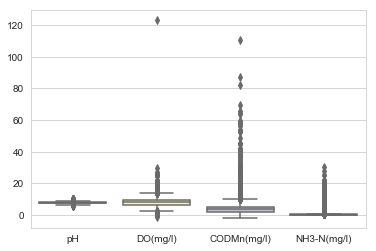

In [6]:
plt.figure()
sns.set_style("whitegrid")
sns.boxplot(data=df,palette="Set3")
plt.savefig('../img/before_z_score_box_plot.pdf')
plt.show()

In [7]:
# matplotlib.rcParams['font.family']='Times New Roman'
matplotlib.rcParams['font.family']='Arial'

<Figure size 432x288 with 0 Axes>

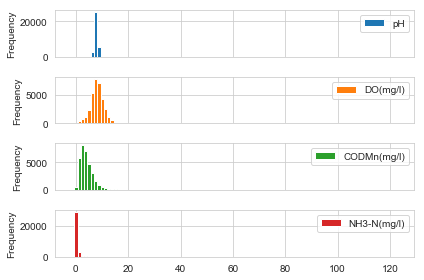

In [8]:
plt.figure()
df.plot.hist(subplots=True, bins=100)  #将各列在一figure中分成子图，
plt.legend() 
plt.tight_layout()
plt.savefig('../img/before_z_score.pdf')
plt.show()

In [9]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter 

# ymajorFormatter = FormatStrFormatter('%1.2f') #设置y轴标签文本的格式
ymajorFormatter = FormatStrFormatter('%d') #设置y轴标签文本的格式
# ymajorLocator   = MultipleLocator(0.5) #将y轴主刻度标签设置为0.5的倍数
# yminorLocator  = MultipleLocator(0.01) #将此y轴次刻度标签设置为0.1的倍数

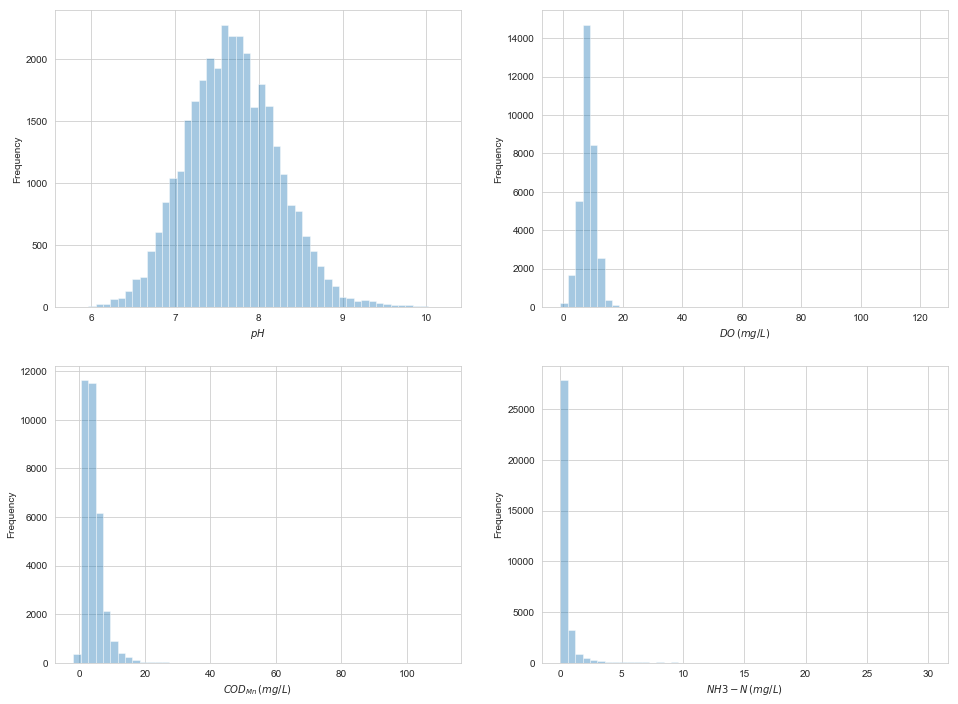

In [10]:
plt.figure(figsize=(16, 12))

ax = plt.subplot(221)
sns.distplot(pd.Series(df.dropna(axis=0)['pH'],name='$pH$'), kde=False, bins=50)
# ax.yaxis.set_major_locator(ymajorLocator)
ax.yaxis.set_major_formatter(ymajorFormatter)
ax.set_ylabel("Frequency")

ax = plt.subplot(222)
sns.distplot(pd.Series(df.dropna(axis=0)['DO(mg/l)'],name='$DO\,(mg/L)$'), kde=False, bins=50)
ax.yaxis.set_major_formatter(ymajorFormatter)
ax.set_ylabel("Frequency")


ax = plt.subplot(223)
sns.distplot(pd.Series(df.dropna(axis=0)['CODMn(mg/l)'],name='$COD_{Mn}\,(mg/L)$'), kde=False, bins=50)
ax.yaxis.set_major_formatter(ymajorFormatter)
ax.set_ylabel("Frequency")


ax = plt.subplot(224)
sns.distplot(pd.Series(df.dropna(axis=0)['NH3-N(mg/l)'],name='$NH3-N\,(mg/L)$'), kde=False, bins=50)
ax.yaxis.set_major_formatter(ymajorFormatter)
ax.set_ylabel("Frequency")


plt.savefig('../img/before_z_score_distribution_v2.pdf')
plt.show()

In [11]:
df[df["DO(mg/l)"] > 40]

,水系,点位名称,河流名称,pH,DO(mg/l),CODMn(mg/l),NH3-N(mg/l),本周水质
2627,松花江流域,抚远,黑龙江,7.14,123.0,7.2,0.28,4


In [12]:
df[df["CODMn(mg/l)"] > 70]

,水系,点位名称,河流名称,pH,DO(mg/l),CODMn(mg/l),NH3-N(mg/l),本周水质
27792,淮河流域,安徽宿州杨庄,奎河,8.10,8.90,110.8,0.82,6
28888,黄河流域,山西运城河津大桥,汾河,7.19,1.09,87.3,0.97,6
28913,黄河流域,山西运城河津大桥,汾河,7.14,1.40,82.0,1.76,6


In [13]:
drop_columns = ['水系', '点位名称', '河流名称']

df = df.dropna(axis=0)
df.drop(drop_columns, 1, inplace=True)

In [14]:
df[df.isnull().values==True]

,pH,DO(mg/l),CODMn(mg/l),NH3-N(mg/l),本周水质


In [15]:
df["pH"] = (df["pH"] - df["pH"].mean())/df["pH"].std(ddof=0)
df["DO(mg/l)"] = (df["DO(mg/l)"] - df["DO(mg/l)"].mean())/df["DO(mg/l)"].std(ddof=0)
df["CODMn(mg/l)"] = (df["CODMn(mg/l)"] - df["CODMn(mg/l)"].mean())/df["CODMn(mg/l)"].std(ddof=0)
df["NH3-N(mg/l)"] = (df["NH3-N(mg/l)"] - df["NH3-N(mg/l)"].mean())/df["NH3-N(mg/l)"].std(ddof=0)

<Figure size 432x288 with 0 Axes>

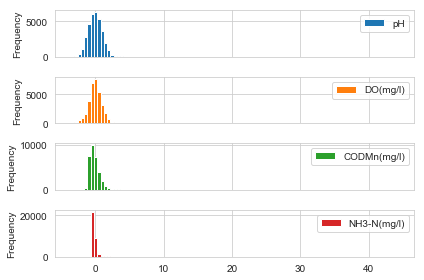

In [16]:
plt.figure()
df.plot.hist(subplots=True, bins=100)  #将各列在一figure中分成子图，
plt.legend() 
plt.tight_layout()
plt.savefig('../img/after_z_score.pdf')
plt.show()

In [17]:
# pd.Series(df['pH'],name='$pH$')
# pd.Series(df['DO(mg/l)'],name='$DO (mg/L)$')
# pd.Series(df['CODMn(mg/l)'],name='$COD_{Mn} (mg/L)$')
# pd.Series(df['NH3-N(mg/l)'],name='$NH3-N (mg/L)$')


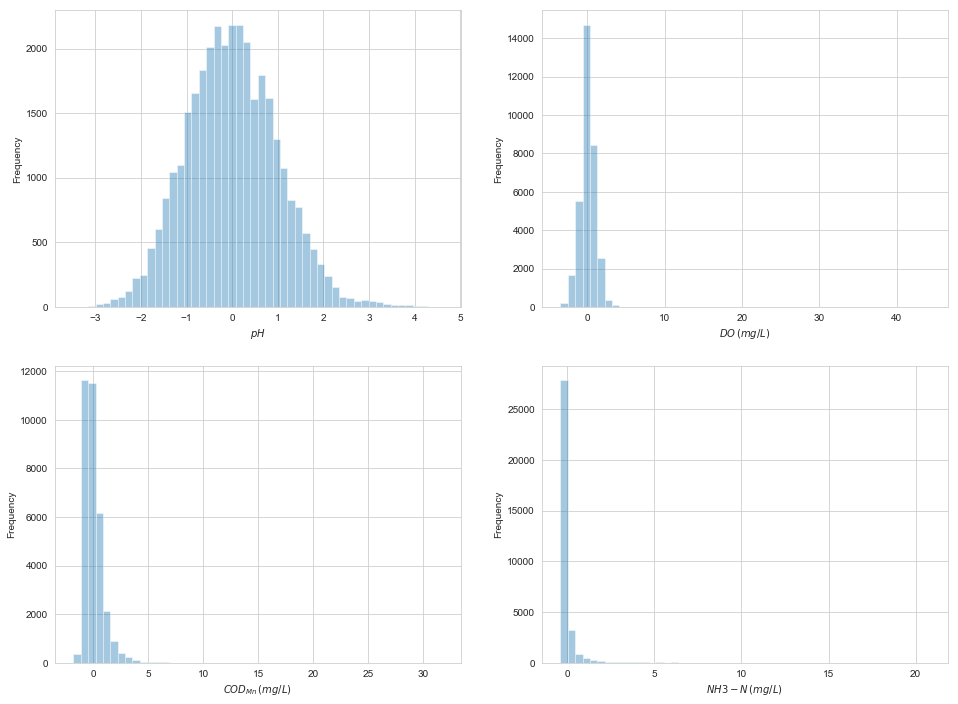

In [18]:
plt.figure(figsize=(16, 12))

ax = plt.subplot(221)
sns.distplot(pd.Series(df['pH'],name='$pH$'), kde=False, bins=50)
# ax.yaxis.set_major_locator(ymajorLocator)
ax.yaxis.set_major_formatter(ymajorFormatter)
ax.set_ylabel("Frequency")

ax = plt.subplot(222)
sns.distplot(pd.Series(df['DO(mg/l)'],name='$DO\,(mg/L)$'), kde=False, bins=50)
ax.yaxis.set_major_formatter(ymajorFormatter)
ax.set_ylabel("Frequency")


ax = plt.subplot(223)
sns.distplot(pd.Series(df['CODMn(mg/l)'],name='$COD_{Mn}\,(mg/L)$'), kde=False, bins=50)
ax.yaxis.set_major_formatter(ymajorFormatter)
ax.set_ylabel("Frequency")


ax = plt.subplot(224)
sns.distplot(pd.Series(df['NH3-N(mg/l)'],name='$NH3-N\,(mg/L)$'), kde=False, bins=50)
ax.yaxis.set_major_formatter(ymajorFormatter)
ax.set_ylabel("Frequency")


plt.savefig('../img/after_z_score_distribution_v2.pdf')
plt.show()

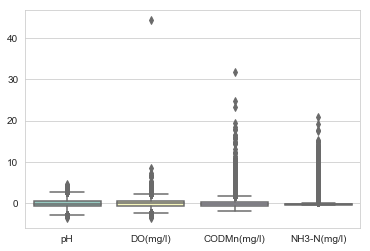

In [19]:
plt.figure()
sns.set_style("whitegrid")
sns.boxplot(data=df[["pH","DO(mg/l)","CODMn(mg/l)","NH3-N(mg/l)"]],palette="Set3")
plt.savefig('../img/after_z_score_box_plot.pdf')
plt.show()

In [20]:
# output_path = os.getcwd()+'/../data/water/csv/20122018freshwater_four_feature.csv'
# data.to_csv(output_path, encoding='utf-8', index=False)